In [1]:
from osgeo import gdal
#import gdal
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import elevation 
import pandas as pd

In [4]:
dem_path = 'training_site/DEM/Low-res_DEM/'
file_path = dem_path + "Firsoff_HiRISE_5_low_res.tif-adj.tif"
gdal_data = gdal.Open(file_path)

gdal_band = gdal_data.GetRasterBand(1)
nodataval = gdal_band.GetNoDataValue()

# convert to a numpy array
data_array=[]
data_array = gdal_band.ReadAsArray().astype(np.float64)
# data_array

# replace missing values if necessary
if np.any(data_array == nodataval):
    data_array[data_array == nodataval] = np.nan

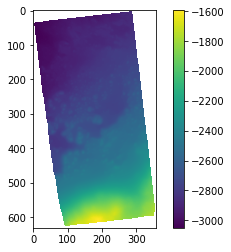

In [5]:
plt.figure()
plt.imshow(data_array)
plt.colorbar()
plt.show()


In [20]:
data_array_interp.max()

227

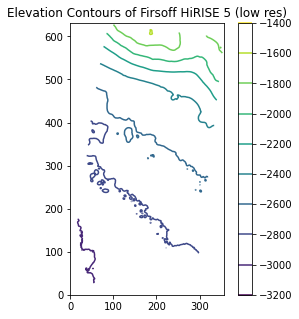

In [6]:
#Plot out data with Matplotlib's 'contour'
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111)
plt.contour(data_array)
plt.title("Elevation Contours of Firsoff HiRISE 5 (low res)")
cbar = plt.colorbar()
plt.gca().set_aspect('equal')
plt.show()

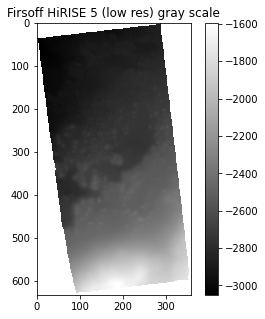

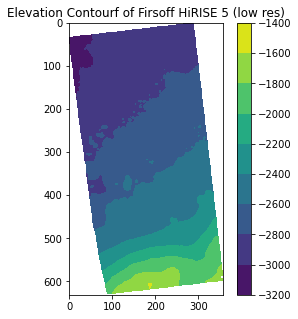

In [7]:
#Plot image in grayscale
plt.figure(figsize=(5,5))
plt.imshow(data_array, cmap = 'gray')
plt.colorbar()
plt.title("Firsoff HiRISE 5 (low res) gray scale")
plt.show()


#Plot a contourf graph
plt.figure(figsize=(5,5))
plt.title("Elevation Contourf of Firsoff HiRISE 5 (low res)")
plt.contourf(data_array)
plt.colorbar()
plt.gca().set_aspect('equal')
plt.gca().invert_yaxis()
plt.show()


In [8]:
import os
import subprocess
from osgeo import gdal
import matplotlib.pyplot as plt

In [9]:
dem = gdal.Open(file_path)
slp = gdal.DEMProcessing(dem_path + "slope.tif", dem, "slope", computeEdges=True) 

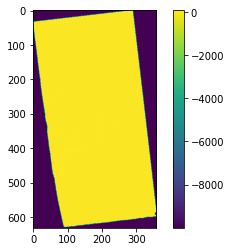

In [10]:
slparray = slp.GetRasterBand(1).ReadAsArray()


# Don't use matplotlib to visualize the slope
# Use richdem as shown below
plt.figure()
plt.imshow(slparray)
plt.colorbar()
plt.show()

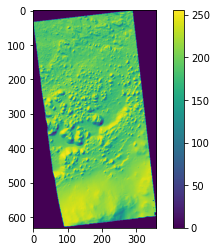

In [11]:
# Creating a Hillshade
hillshade = gdal.DEMProcessing(dem_path + "hillshade1.tif", dem, "hillshade")
hillshade_array = hillshade.GetRasterBand(1).ReadAsArray()

plt.figure()
plt.imshow(hillshade_array)
plt.colorbar()
plt.show()


In [12]:
import richdem as rd


A Slope calculation (degrees)
C Horn, B.K.P., 1981. Hill shading and the reflectance map. Proceedings of the IEEE 69, 14–47. doi:10.1109/PROC.1981.11918

t Wall-time = 0.0126271


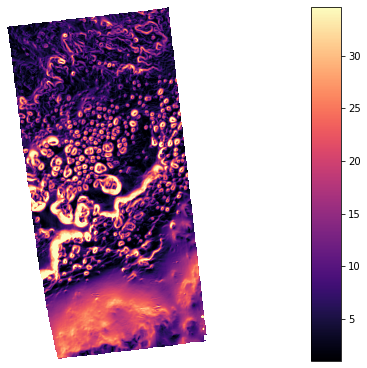

In [13]:
rd_dem = rd.LoadGDAL(file_path)
rd_slope = rd.TerrainAttribute(rd_dem, attrib="slope_degrees")
rd.rdShow(rd_slope, axes=False, cmap='magma', figsize=(8, 5.5))
plt.show()

# To save the result
# rd.SaveGDAL("rd_slope.tif", rd_slope)


A Aspect attribute calculation
C Horn, B.K.P., 1981. Hill shading and the reflectance map. Proceedings of the IEEE 69, 14–47. doi:10.1109/PROC.1981.11918

t Wall-time = 0.0154595


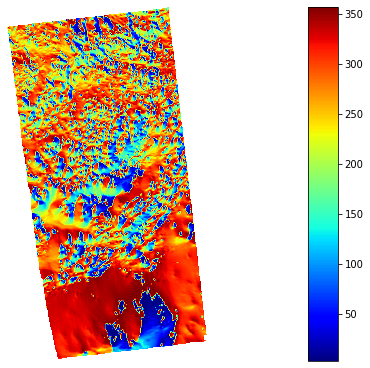

In [14]:
aspect = rd.TerrainAttribute(rd_dem, attrib='aspect')
rd.rdShow(aspect, axes=False, cmap='jet', figsize=(8, 5.5))
plt.show()

In [15]:
dataset = gdal.Open(file_path)

In [16]:
# Getting som info about our DEM
print("Driver: {}/{}".format(dataset.GetDriver().ShortName,
                            dataset.GetDriver().LongName))
print("Size is {} x {} x {}".format(dataset.RasterXSize,
                                    dataset.RasterYSize,
                                    dataset.RasterCount))
print("Projection is {}".format(dataset.GetProjection()))
geotransform = dataset.GetGeoTransform()
if geotransform:
    print("Origin = ({}, {})".format(geotransform[0], geotransform[3]))
    print("Pixel Size = ({}, {})".format(geotransform[1], geotransform[5]))

Driver: GTiff/GeoTIFF
Size is 358 x 632 x 1
Projection is PROJCS["unnamed",GEOGCS["Geographic Coordinate System",DATUM["D_MARS",SPHEROID["MARS",3396190,0]],PRIMEM["Reference Meridian",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Equirectangular"],PARAMETER["standard_parallel_1",0],PARAMETER["central_meridian",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
Origin = (-534141.0, 135873.0)
Pixel Size = (18.0, -18.0)


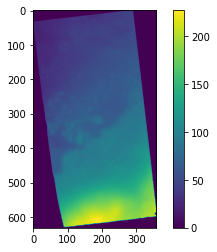

In [17]:
data_array_interp = np.interp(data_array, (-3200.0, -1400), (0, 255)).astype(np.uint8)
plt.figure()
plt.imshow(data_array_interp)
plt.colorbar()
plt.show()

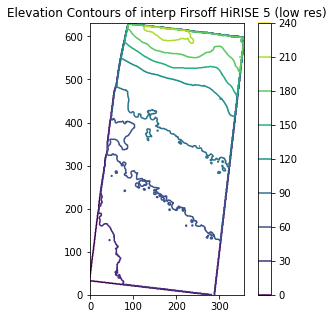

In [18]:
#Plot out data with Matplotlib's 'contour' on data_array_interp
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111)
plt.contour(data_array_interp)
plt.title("Elevation Contours of interp Firsoff HiRISE 5 (low res)")
cbar = plt.colorbar()
plt.gca().set_aspect('equal')
plt.show()

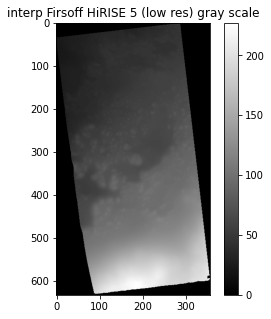

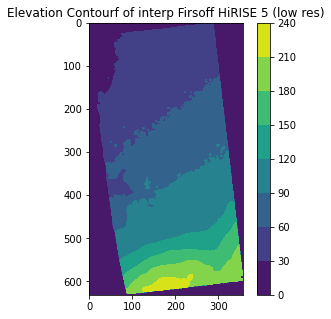

In [19]:
#Plot image in grayscale on data_array_interp
plt.figure(figsize=(5,5))
plt.imshow(data_array_interp, cmap = 'gray')
plt.colorbar()
plt.title("interp Firsoff HiRISE 5 (low res) gray scale")
plt.show()


#Plot a contourf graph on data_array_interp
plt.figure(figsize=(5,5))
plt.title("Elevation Contourf of interp Firsoff HiRISE 5 (low res)")
plt.contourf(data_array_interp)
plt.colorbar()
plt.gca().set_aspect('equal')
plt.gca().invert_yaxis()
plt.show()

In [27]:
from scipy import ndimage

sx shape: (632, 358), sy shape (632, 358)
sx.max(): 255, sq_sx.max() 65025
sy.max(): 255, sq_sy.max() 65025


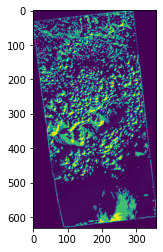

In [28]:
# Get x-gradient in "sx"
sx = ndimage.sobel(data_array_interp,axis=0,mode='constant')
# Get y-gradient in "sy"
sy = ndimage.sobel(data_array_interp,axis=1,mode='constant')
# Get square root of sum of squares
# sobel=np.hypot(sx,sy)
print("sx shape: {}, sy shape {}".format(sx.shape, sy.shape))


sq_sx = np.asarray([np.power(sx[i][j], 2) for i in range(sx.shape[0]) for j in range(sx.shape[1])])
sq_sy = np.asarray([np.power(sy[i][j], 2) for i in range(sy.shape[0]) for j in range(sy.shape[1])])

print("sx.max(): {}, sq_sx.max() {}".format(sx.max(), sq_sx.max()))
print("sy.max(): {}, sq_sy.max() {}".format(sy.max(), sq_sy.max()))

slope_result = np.sqrt(sq_sx+sq_sy)
slope_result = np.reshape(slope_result, (632, 358))
# Hopefully see some edges

plt.imshow(slope_result)
plt.show()

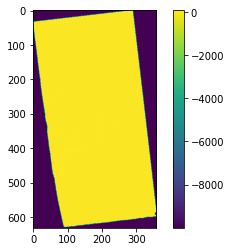

In [29]:
plt.figure()
plt.imshow(slparray)
plt.colorbar()
plt.show()